In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import *

In [2]:
import os
cwd = os.getcwd()
os.chdir(os.path.join(cwd,'..\..\..'))

In [3]:
df= pd.read_csv('ExMAS/data/big_test2.csv', header=[0,1])

In [4]:
df

200                                                       \
  mean_lambda_r vehhour vehhour_ns passhour passhour_ns     passUtil   
0      0.193012   91766      92724    93087       92724  1437.351160   
1      0.174867   89965      93582    95260       93582  1440.328310   
2      0.165530   93860     100944   106056      100944  1531.749575   
3      0.173367   89549      97729   104909       97729  1465.113765   
4      0.190422   83944      92973   101321       92973  1381.445085   

                                                400  ...       2500  \
  passUtil_ns shared_ratio avg_degree mean_lambda_r  ... avg_degree   
0   1438.2821        0.030   1.015239      0.140198  ...   1.123319   
1   1451.5649        0.138   1.074156      0.187034  ...   1.305803   
2   1565.6795        0.266   1.156737      0.187841  ...   1.483811   
3   1515.8578        0.310   1.191019      0.225203  ...   1.630382   
4   1442.1459        0.344   1.224708      0.234686  ...   1.790361   

           3000                                                        \
  mean_lambda_r  vehhour vehhour_ns passhour passhour_ns     passUtil   
0      0.208607  1323945    1439371  1470234     1439371  22180.96129   
1      0.262479  1185951    1442004  1532638     1442004  21872.56135   
2      0.303695  1080971    1424937  1582060     1424937  21295.75879   
3      0.344266  1015076    1427820  1652810     1427820  21056.66793   
4      0.000000        0          0        0           0      0.00000   

                                       
  passUtil_ns shared_ratio avg_degree  
0  22326.0788     0.244000   1.139254  
1  22366.9168     0.467867   1.321536  
2  22102.3438     0.596800   1.505493  
3  22147.0380     0.663667   1.668621  
4      0.0000     0.000000   0.000000  

[5 rows x 99 columns]

In [5]:
df_lam = df.xs('mean_lambda_r', level=1, axis=1)
df_shared = df.xs('shared_ratio',level=1, axis=1)
df_degree = df.xs('avg_degree', level=1, axis=1)

In [6]:
x_ax=np.array([0.15,0.2,0.25,0.3,0.35])


In [7]:
np.array(df_lam['200'])

array([0.1930119 , 0.17486713, 0.16553011, 0.17336652, 0.19042158])

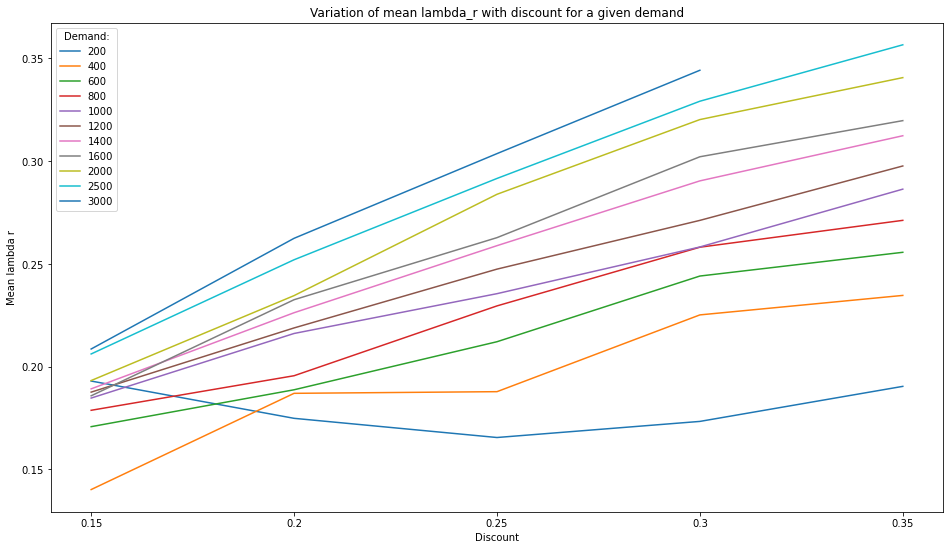

In [8]:
plt.figure(figsize=(16,9))
for c in df_lam.columns:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df_lam[c])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df_lam[c]),label = c)

plt.xlabel('Discount')
plt.ylabel('Mean lambda r')
plt.xticks(df.index, x_ax)
plt.title('Variation of mean lambda_r with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()

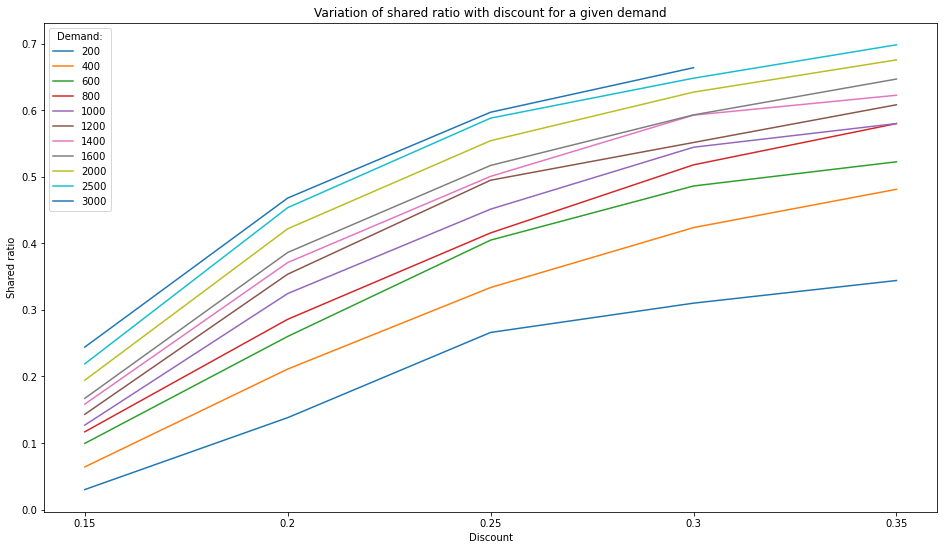

In [9]:
plt.figure(figsize=(16,9))
for c in df_shared.columns:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df_shared[c])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df_shared[c]),label = c)

plt.xlabel('Discount')
plt.ylabel('Shared ratio')
plt.xticks(df.index, x_ax)
plt.title('Variation of shared ratio with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()

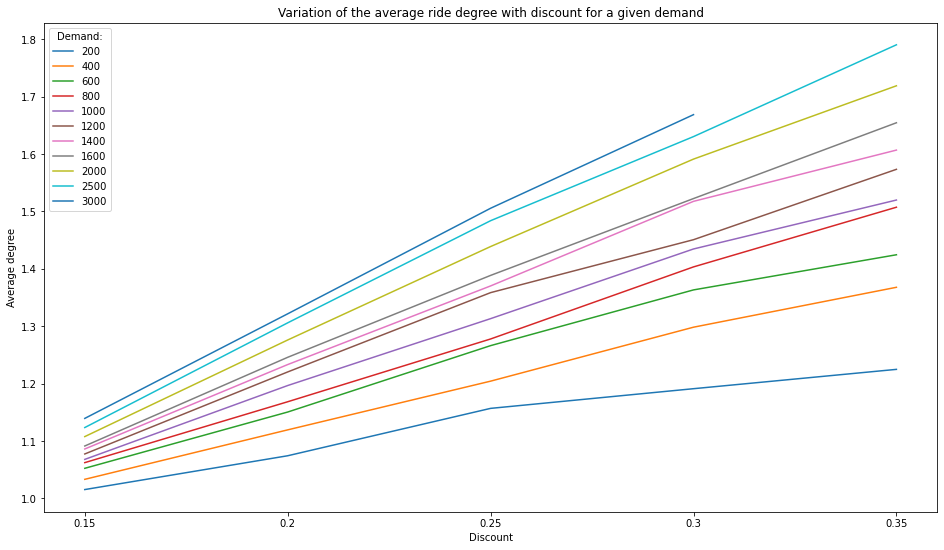

In [10]:
plt.figure(figsize=(16,9))
for c in df_shared.columns:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df_degree[c])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df_degree[c]),label = c)

plt.xlabel('Discount')
plt.ylabel('Average degree')
plt.xticks(df.index, x_ax)
plt.title('Variation of the average ride degree with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()

In [11]:
demand = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2500, 3000]
mux = pd.MultiIndex.from_product([demand, ['veh_portion','pass_hour_portion','pass_util_portion']])
df2 = pd.DataFrame(index=df.index, columns = mux)

In [12]:
for c in demand:
    df2[c,'veh_portion']=(df[str(c),'vehhour']-df[str(c),'vehhour_ns'])/df[str(c),'vehhour_ns']
    df2[c,'pass_hour_portion'] = (df[str(c),'passhour']-df[str(c),'passhour_ns'])/df[str(c),'passhour_ns']
    df2[c,'pass_util_portion'] = (df[str(c),'passUtil']-df[str(c),'passUtil_ns'])/df[str(c),'passUtil_ns']

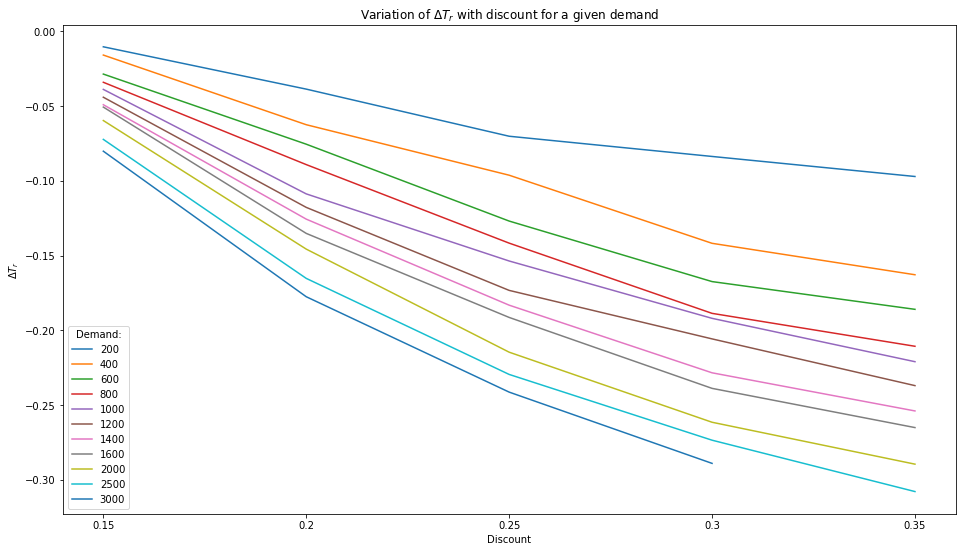

In [13]:
plt.figure(figsize=(16,9))
for c in demand:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df2[c,'veh_portion'])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df2[c,'veh_portion']),label = c)

plt.xlabel('Discount')
plt.ylabel('$\Delta T_r$')
plt.xticks(df.index, x_ax)
plt.title('Variation of $\Delta T_r$ with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()

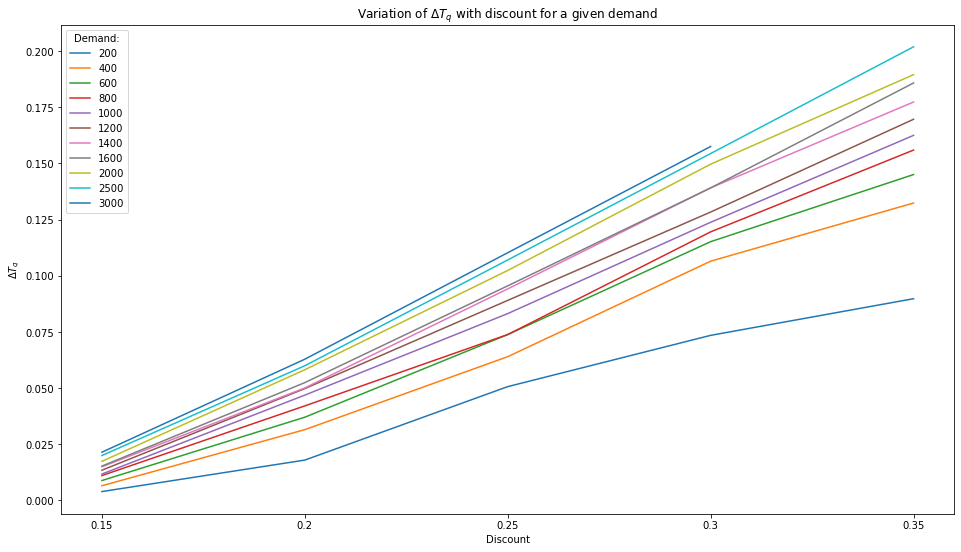

In [14]:
plt.figure(figsize=(16,9))
for c in demand:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df2[c,'pass_hour_portion'])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df2[c,'pass_hour_portion']),label = c)

plt.xlabel('Discount')
plt.ylabel('$\Delta T_q$')
plt.xticks(df.index, x_ax)
plt.title('Variation of $\Delta T_q$ with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()

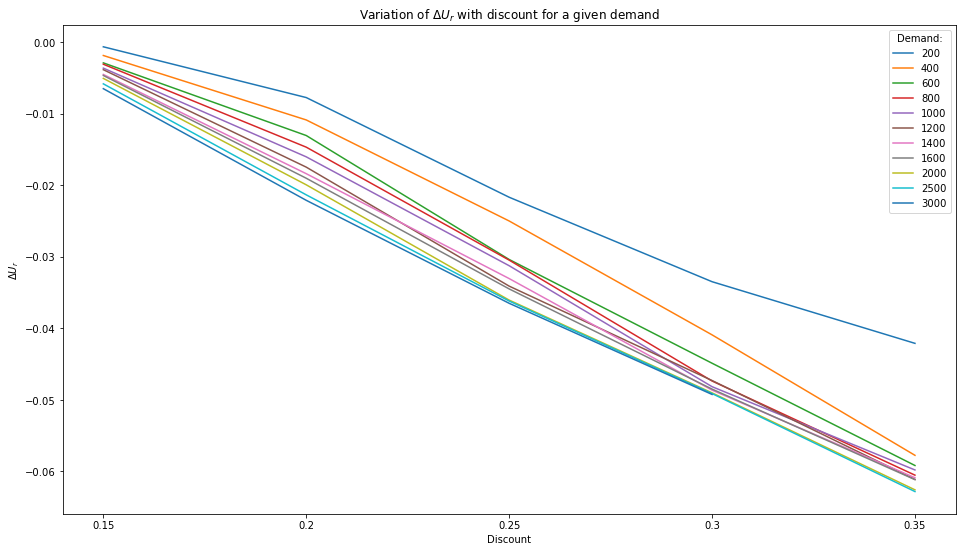

In [15]:
plt.figure(figsize=(16,9))
for c in demand:
    if c =='3000':
        plt.plot(np.array(df.index)[:-1],np.array(df2[c,'pass_util_portion'])[:-1], label = c)
    else:
        plt.plot(np.array(df.index), np.array(df2[c,'pass_util_portion']),label = c)

plt.xlabel('Discount')
plt.ylabel('$\Delta U_r$')
plt.xticks(df.index, x_ax)
plt.title('Variation of $\Delta U_r$ with discount for a given demand')
plt.legend(title='Demand:',loc='best')
plt.show()